In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


Number of faces detected: 1


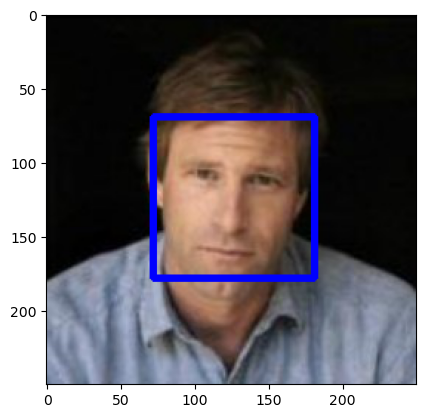

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
"""face_cascade = cv2.CascadeClassifier('haarcascade\haarcascade_frontalface_default.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)"""

face_cascade = cv2.CascadeClassifier("E:\Mini Project\opencv-master\data\haarcascades\haarcascade_frontalface_alt.xml")

img = cv2.imread(human_files[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.03, 3)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    #cv2.recctange(image, start_point, end_point, color, thickness)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #face_cascade function called
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

print('What percentage of the first 100 images in human_files have a detected human face?'
      '\n{:.0%}'.format(sum(map(face_detector, human_files_short)) / 100))
print('What percentage of the first 100 images in dog_files have a detected human face?'
      '\n{:.0%}'.format(sum(map(face_detector, dog_files_short)) / 100))



What percentage of the first 100 images in human_files have a detected human face?
96%
What percentage of the first 100 images in dog_files have a detected human face?
18%


In [6]:
import torch
import torchvision.models as models


# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
# usage of vgg16 : Uses GPU weights been trained using ImageNet a very large very popular dataset used for classification 
# check if CUDA is available

use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    print("YES")
    VGG16 = VGG16.cuda()
    

d:\Users\Alex Christopher\anaconda3\envs\miniproj\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Users\Alex Christopher\anaconda3\envs\miniproj\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
d:\Users\Alex Christopher\anaconda3\envs\miniproj\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


YES


In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):

    pil_image = Image.open(img_path)
    transformed_image = transforms.Resize(224)(pil_image)
    transformed_image = transforms.CenterCrop(224)(pil_image)
    transformed_image = transforms.ToTensor()(transformed_image)
    transformed_image = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])(transformed_image)
    transformed_image = transformed_image.cuda() if torch.cuda.is_available() else transformed_image
    output_index = int((VGG16(transformed_image.unsqueeze(0))).argmax())
    return output_index # predicted class index

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.    
    return True if VGG16_predict(img_path) in range(151, 269) else False # true/false

In [9]:
print('What percentage of the images in human_files_short have a detected dog?'
      '\n{:.0%}'.format(sum(map(dog_detector, human_files_short)) / 100))
print('What percentage of the images in dog_files_short have a detected dog?'
      '\n{:.0%}'.format(sum(map(dog_detector, dog_files_short)) / 100))

What percentage of the images in human_files_short have a detected dog?
0%
What percentage of the images in dog_files_short have a detected dog?
92%


In [10]:
import os
from torchvision import datasets

import numpy as np
import torch
from PIL import ImageFile
from torchvision import transforms

ImageFile.LOAD_TRUNCATED_IMAGES = True
use_cuda = torch.cuda.is_available()

image_transforms = {'train': transforms.Compose([transforms.RandomRotation(10),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(224),                                     
                                     transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]),
                   'valid': transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]),
                   'test': transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])])
                  }

loaders_scratch = {'train': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/train', 
                                                                             transform=image_transforms['train']),
                                                        batch_size=25, shuffle=True),                    
                   'valid': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/valid', 
                                                                             transform=image_transforms['valid']),
                                                        batch_size=25, shuffle=True), 
                   'test': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/test', 
                                                                            transform=image_transforms['test']),
                                                        batch_size=25, shuffle=True)}

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.c1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.c2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.c3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.fc1 = nn.Linear(in_features=6272, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=412)
        self.fc4 = nn.Linear(in_features=412, out_features=133)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.c1(x), 3))
        x = F.relu(F.max_pool2d(self.c2(x), 3))
        x = F.relu(F.max_pool2d(self.c3(x), 3))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [12]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.0005)

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            # print("Loss: {}".format(loss))
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        total_correct = 0
        total = 0
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            max_arg_output = torch.argmax(output, dim=1)
            total_correct += int(torch.sum(max_arg_output == target))
            total += data.shape[0]
        print('Validation accuracy: {:.0%}'.format(total_correct/total))
        
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if valid_loss_min > valid_loss:
            print("Saving the model...")
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)

            
    # return trained model
    return model

In [14]:
# train the model
model_scratch = train(2, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Validation accuracy: 3%
Epoch: 1 	Training Loss: 4.817834 	Validation Loss: 4.602097
Saving the model...
Validation accuracy: 4%
Epoch: 2 	Training Loss: 4.572533 	Validation Loss: 4.410116
Saving the model...


<All keys matched successfully>

In [15]:
def test(loaders, model, criterion, use_cuda):

    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        loss = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        pred = output.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [16]:
# call test function  
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.398263


Test Accuracy:  4% (35/836)


In [17]:
import numpy as np
import torch
from PIL import ImageFile
from torchvision import transforms,datasets

ImageFile.LOAD_TRUNCATED_IMAGES = True
use_cuda = torch.cuda.is_available()

image_transforms = {'train': transforms.Compose([transforms.RandomRotation(10),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(224),                                     
                                     transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]),
                   'valid': transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]),
                   'test': transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])])
                  }

loaders_transfer = {'train': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/train', 
                                                                             transform=image_transforms['train']),
                                                        batch_size=25, shuffle=True),                    
                   'valid': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/valid', 
                                                                             transform=image_transforms['valid']),
                                                        batch_size=25, shuffle=True), 
                   'test': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/test', 
                                                                            transform=image_transforms['test']),
                                                        batch_size=25, shuffle=True)}

In [18]:
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

model_transfer = models.resnet18(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

num_ftrs = model_transfer.fc.in_features

class TransferLearning(nn.Module):
    def __init__(self):
        super(TransferLearning, self).__init__()
        self.fc1 = nn.Linear(in_features=num_ftrs, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=133)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_transfer.fc = TransferLearning()

if use_cuda:
    model_transfer = model_transfer.cuda()

d:\Users\Alex Christopher\anaconda3\envs\miniproj\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
import torch.optim as optim

criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters(), lr = 0.0005)

In [20]:
# load the model that got the best validation accuracy (uncomment the line below)
# train the model
model_transfer = train(2, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Validation accuracy: 57%
Epoch: 1 	Training Loss: 3.664213 	Validation Loss: 1.728210
Saving the model...
Validation accuracy: 72%
Epoch: 2 	Training Loss: 1.918808 	Validation Loss: 0.986389
Saving the model...


<All keys matched successfully>

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.997943


Test Accuracy: 71% (597/836)


In [93]:
from PIL import Image
from torchvision  import transforms
from torch.nn.functional import softmax
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    pil_image = Image.open(img_path)
    transformed_image = transforms.Resize(224)(pil_image)
    transformed_image = transforms.CenterCrop(224)(pil_image)
    transformed_image = transforms.ToTensor()(transformed_image)
    transformed_image = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])(transformed_image)

    transformed_image = transformed_image.cuda() if torch.cuda.is_available() else transformed_image
    output_raw = model_transfer(transformed_image.unsqueeze(0))
    output_softmax = softmax(output_raw, dim=1)
    output = int(output_raw.argmax())

    return class_names[output], float(output_softmax[0][output])

In [94]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display


def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    face = face_detector(img_path)
    breed, confidence = predict_breed_transfer(img_path)
    image_plt = plt.imread(img_path)
    if confidence < 0.3:        
        raise Exception('Niether dog or human are predicted.')        
    elif face:
        plt.imshow(image_plt)
        plt.title('hello, dog! You are: {}'.format(breed))
    else:
        plt.imshow(image_plt)
        plt.title('hello, dog! You are: {}'.format(breed))      
    
    
       
    return breed

'Golden retriever'

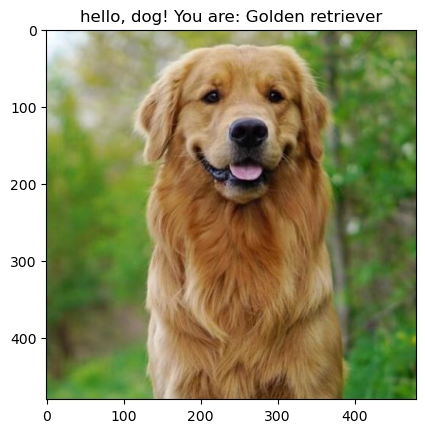

In [54]:
run_app('goldenretriever.jpg')

In [25]:
run_app('4jpg.jpg')

Exception: Niether dog or human are predicted.

In [51]:
run_app('cutedog.jpg')

AttributeError: type object 'Image' has no attribute 'open'

In [99]:
# Import the required Libraries
from tkinter import *
from tkinter import ttk, filedialog
from tkinter.filedialog import askopenfile
from pathlib import Path

# Create an instance of tkinter frame
win = Tk()

# Set the geometry of tkinter frame
win.geometry("700x350")


def open_file():
   file = filedialog.askopenfile(mode='rb', filetypes=[('*.jpg', '*.jpeg')])
   print(type(file.name))
   new_name = Path(file.name)
   file_name = str(file.name)
   print(str(file.name))
   if file:
      content = file.read()
      file.close()
      print("%d characters in this file" % len(content))
      generate_button = ttk.Button(win, text="Generate Breed", command=run_app(new_name)).pack(pady=20)


# Add a Label widget
label = Label(win, text="Select the dog images", font=('Georgia 13'))
label.pack(pady=10)

# Create a Button

browse_button = ttk.Button(win, text="Browse", command=open_file).pack(pady=20)

#generate_button = ttk.Button(win, text="Generate Breed", command=run_app(file_name)).pack(pady=20)
#generate_button = ttk.Button(win, text="Generate Breed", command=open_file).pack(pady=20)

win.mainloop()

<class 'str'>
E:/Mini Project/dog-human-classifier-neural-network/Characters_bolt.jpeg
31454 characters in this file


Exception in Tkinter callback
Traceback (most recent call last):
  File "d:\Users\Alex Christopher\anaconda3\envs\miniproj\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Alex Christopher\AppData\Local\Temp\ipykernel_28108\3932813215.py", line 24, in open_file
    generate_button = ttk.Button(win, text="Generate Breed", command=run_app(new_name)).pack(pady=20)
  File "C:\Users\Alex Christopher\AppData\Local\Temp\ipykernel_28108\1382844477.py", line 10, in run_app
    face = face_detector(img_path)
  File "C:\Users\Alex Christopher\AppData\Local\Temp\ipykernel_28108\2990095928.py", line 3, in face_detector
    img = cv2.imread(img_path)
TypeError: Can't convert object of type 'WindowsPath' to 'str' for 'filename'


In [ ]:
print("HELLO")

HELLO


'Golden retriever'

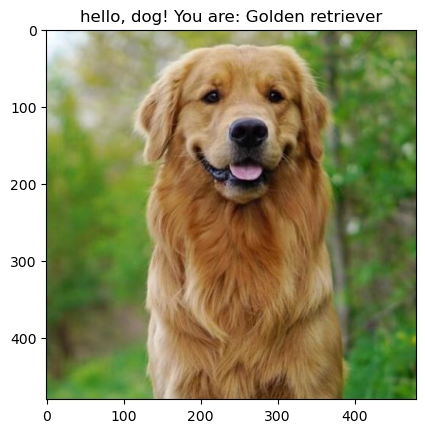

In [62]:
run_app(r"C:\Users\Alex Christopher\Downloads\goldenretriever.jpg")

'Golden retriever'

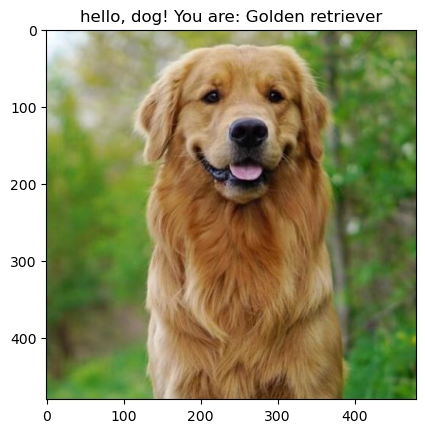

In [70]:
run_app("C:/Users/Alex Christopher/Downloads/goldenretriever.jpg")

'Golden retriever'

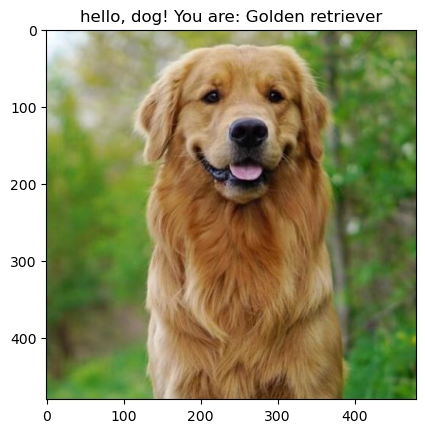

In [82]:
run_app("C:/Users/Alex Christopher/Downloads/goldenretriever.jpg")